In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
plt.style.use(['seaborn-v0_8-bright','dark_background'])

In [2]:
data=pd.read_csv('Customer_Data.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [4]:
columns=data.columns
columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

# Data exploration and pre-processing

In [5]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

In [6]:
# Removing rows with missing values.

In [7]:
data.dropna(inplace=True,axis=0,subset=['city','gender','occupation','dependents'])

In [8]:
data['last_transaction']=pd.to_datetime(data['last_transaction'])
data.dropna(inplace=True,axis=0,subset=['last_transaction'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22067 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   customer_id                     22067 non-null  int64         
 1   vintage                         22067 non-null  int64         
 2   age                             22067 non-null  int64         
 3   gender                          22067 non-null  object        
 4   dependents                      22067 non-null  float64       
 5   occupation                      22067 non-null  object        
 6   city                            22067 non-null  float64       
 7   customer_nw_category            22067 non-null  int64         
 8   branch_code                     22067 non-null  int64         
 9   current_balance                 22067 non-null  float64       
 10  previous_month_end_balance      22067 non-null  float64       
 11  average

In [10]:
# Creating a column for days since last transaction
from datetime import datetime
today=datetime.now()
data['datetime_now']=today
data['days_since_last_transaction']=data['datetime_now']-data['last_transaction']
data['days_since_last_transaction']=data['days_since_last_transaction'].dt.days
data['days_since_last_transaction'].head()

0    1937
4    1771
5    1773
6    1811
7    1885
Name: days_since_last_transaction, dtype: int64

In [11]:
data=data.drop(columns=['last_transaction','datetime_now'])

In [12]:
# converting 'gender' to int or float by mapping Male to 1 and Female to 0
data['gender']=data['gender'].replace({'Male': 1, 'Female': 0})
data['gender'].head()

0    1
4    1
5    0
6    1
7    1
Name: gender, dtype: int64

In [13]:
# converting 'occupation' to int or float by mapping values
data['occupation'].unique()

array(['self_employed', 'retired', 'salaried', 'student', 'company'],
      dtype=object)

In [14]:
data['occupation']=data['occupation'].replace({'self_employed': 1, 'salaried': 2, 'retired': 3, 'student': 4, 'company': 5})
data['occupation'].head()

0    1
4    1
5    1
6    3
7    1
Name: occupation, dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22067 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   current_balance                 22067 non-null  float64
 10  previous_month_end_balance      22067 non-null  float64
 11  average_monthly_balance_prevQ   22067 non-null  float64
 12  average_monthly_balance_prevQ2  22067

In [16]:
# Checking the target variable 'churn' distribution
data['churn'].value_counts()/len(data)

churn
0    0.806317
1    0.193683
Name: count, dtype: float64

# Implementing model

In [17]:
# separating dependant and independent variables
X=data.drop(columns=['customer_id','churn'])
Y=data['churn']

In [18]:
# scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

In [19]:
# splitting dataset
from sklearn.model_selection import train_test_split as tts
train_x, test_x, train_y, test_y=tts(scaled_X,Y,train_size=0.8,stratify=Y)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((17653, 19), (4414, 19), (17653,), (4414,))

In [20]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier=DTC(class_weight='balanced')

In [21]:
classifier.fit(train_x,train_y)
predicted_values=classifier.predict(train_x)

In [22]:
# Evaluation metrics over training data
from sklearn.metrics import classification_report
print(classification_report(train_y,predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [23]:
# Over test data
predicted_values=classifier.predict(test_x)
print(classification_report(test_y,predicted_values))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      3559
           1       0.44      0.43      0.43       855

    accuracy                           0.78      4414
   macro avg       0.65      0.65      0.65      4414
weighted avg       0.78      0.78      0.78      4414



## Hypertuning parameters for improving model

In [24]:
classifier=DTC()
classifier.fit(train_x,train_y)
classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### Tuning max_depth parameter

In [25]:
from sklearn.metrics import f1_score
def calc_score(model, x1, y1, x2, y2):
    model.fit(x1,y1)
    
    predict=model.predict(x1)
    f1=f1_score(y1,predict)

    predict=model.predict(x2)
    f2=f1_score(y2,predict)

    return f1, f2

In [26]:
def effect(train_score, test_score, x_axis, title):
    plt.figure(figsize=(5,5), dpi=120)
    plt.plot(x_axis,train_score,color='red',label='train_score')
    plt.plot(x_axis,test_score,color='blue',label='test_score')
    plt.title(title)
    plt.xlabel('parameter value')
    plt.ylabel('f1 score')
    plt.legend()
    plt.show()

In [27]:
max_depth=[i for i in range(1,50)]
train=[]
test=[]

for i in max_depth:
    model=DTC(class_weight='balanced',max_depth=i,random_state=42)
    f1,f2=calc_score(model, train_x, train_y, test_x, test_y)
    train.append(f1)
    test.append(f2)

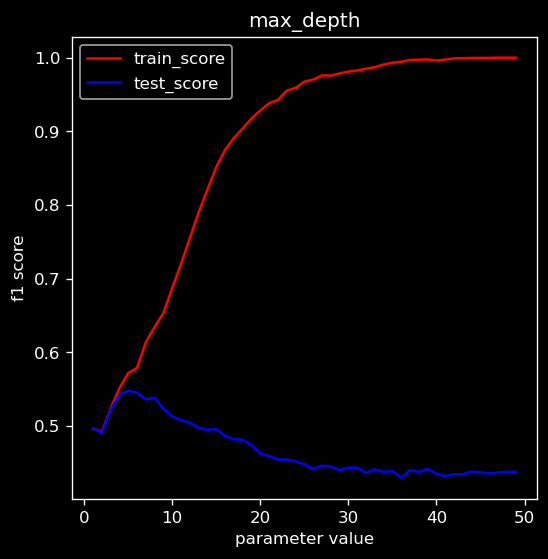

In [28]:
effect(train,test,range(1,50),'max_depth')

In [29]:
# As max depth increases, it initially increases but then performs bad over test data

### Tuning min_samples_split parameter

In [30]:
min_samples=[i for i in range(2,5000,25)]
train=[]
test=[]

for i in min_samples:
    model=DTC(class_weight='balanced',min_samples_split=i,random_state=42)
    f1,f2=calc_score(model,train_x,train_y,test_x,test_y)
    train.append(f1)
    test.append(f2)

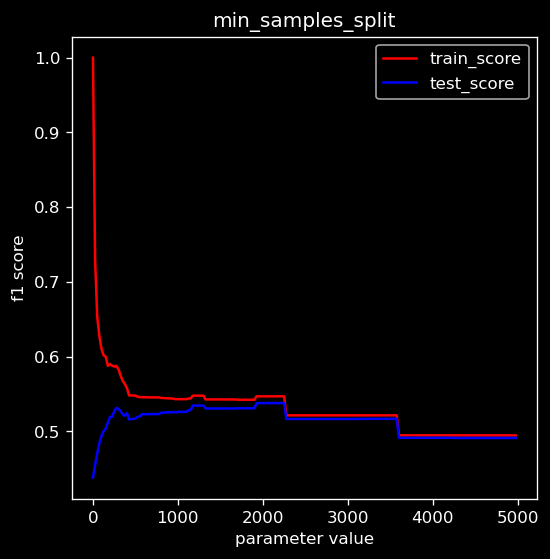

In [31]:
effect(train,test,range(2,5000,25),'min_samples_split')

In [32]:
# Optimal range should be around let's say 950-1000. If param value is too high, model starts to underfit

### Tuning max_leaf_nodes parameter

In [33]:
max_leaf=[i for i in range(2,200,10)]
train=[]
test=[]

for i in max_leaf:
    model=DTC(class_weight='balanced',max_leaf_nodes=i,random_state=42)
    f1,f2=calc_score(model,train_x,train_y,test_x,test_y)
    train.append(f1)
    test.append(f2)

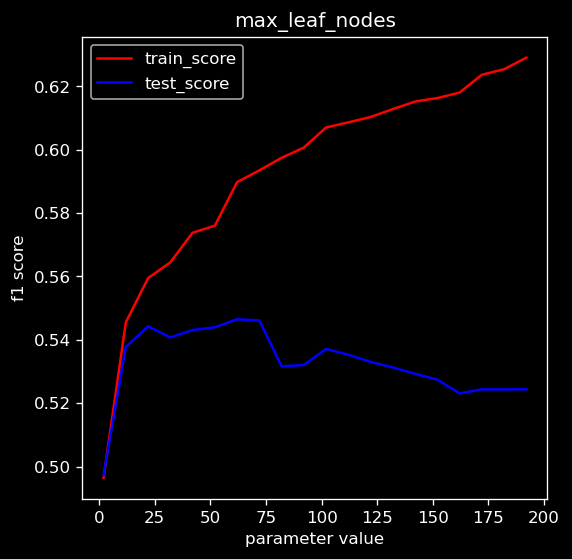

In [35]:
effect(train,test,range(2,200,10),'max_leaf_nodes')

### Tuning min_samples_leaf parameter

In [36]:
min_samples=[i for i in range(2,4000,25)]
train=[]
test=[]

for i in min_samples:
    model=DTC(class_weight='balanced',min_samples_leaf=i,random_state=42)
    f1,f2=calc_score(model,train_x,train_y,test_x,test_y)
    train.append(f1)
    test.append(f2)

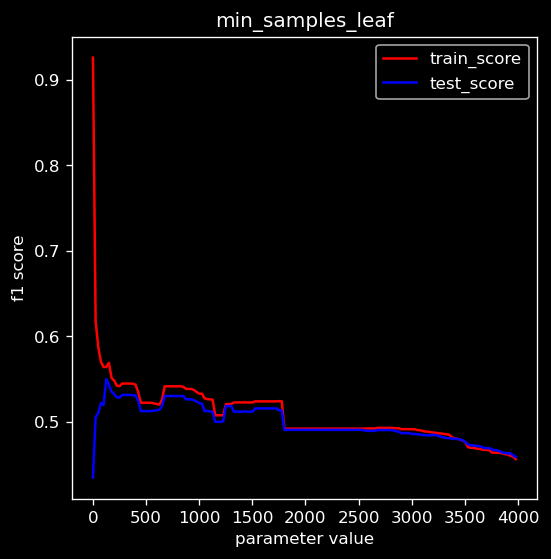

In [37]:
effect(train,test,range(2,4000,25),'min_samples_leaf')

### Checking feature importance

In [38]:
model=DTC(max_depth=9)
model.fit(train_x,train_y)
feature_imp=pd.Series(model.feature_importances_, index=X.columns)
k=feature_imp.sort_values()

Text(0.5, 1.0, 'Feature importances')

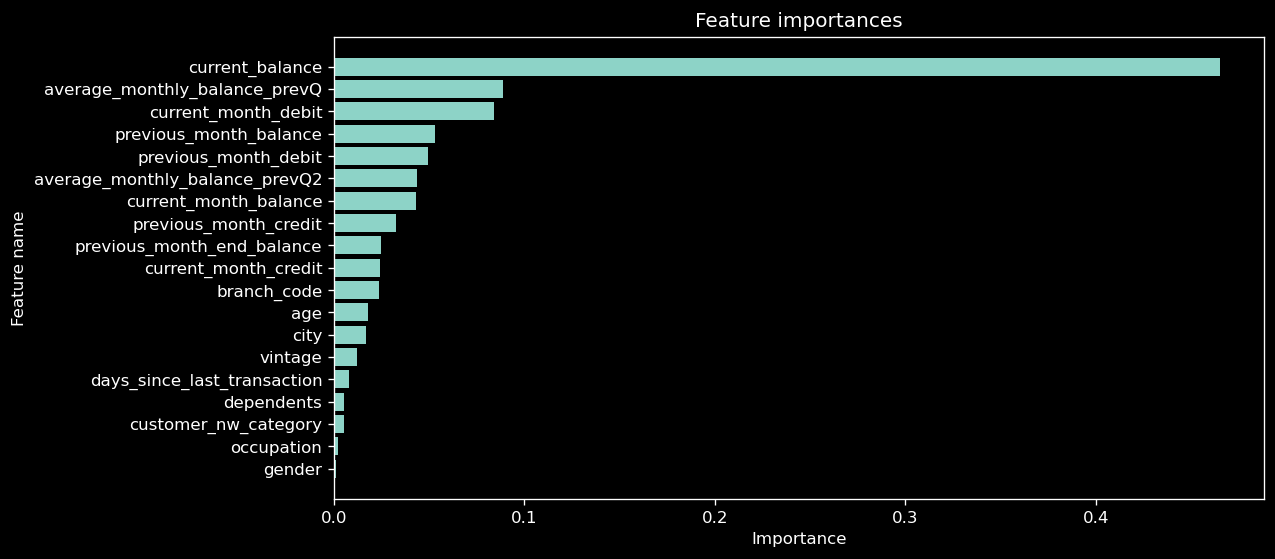

In [39]:
plt.figure(figsize=(10,5),dpi=120)
plt.barh(k.index,k)
plt.xlabel('Importance')
plt.ylabel('Feature name')
plt.title('Feature importances')